In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as npy

bg = pd.read_feather("boardgamegeek.feather")
np = pd.read_feather("netflix_prize.feather")
m = pd.read_feather("movielens_25m.feather")
y = pd.read_feather("yahoo_r2_songs.subsampled.feather")

In [4]:
bg = pd.read_feather("boardgamegeek.feather")
np = pd.read_feather("netflix_prize.feather")
m = pd.read_feather("movielens_25m.feather")
y = pd.read_feather("yahoo_r2_songs.subsampled.feather")

In [21]:
bg.head()

,item_id,user_id,rating
0,213788,Tonydorrf,8.0
1,213788,tachyon14k,8.0
2,213788,Ungotter,8.0
3,213788,brainlocki3,8.0
4,213788,PPMP,8.0


In [ ]:
res = pd.DataFrame(columns = ['Dataset','Number of users','Number of products','Number of ratings','Density'])
for name,ds in zip(['board game dataset','netflix dataset','movielens dataset','yahoo dataset'],[bg,np,m,y]):

    users = len(ds.groupby('user_id'))
    products = len(ds.groupby('item_id'))
    ratings = len(ds)
    density = ratings/(users*products)

    res.loc[len(res.index)] = [name,users,products,ratings,density]

In [19]:
res

,Dataset,Number of users,Number of products,Number of ratings,Density
0,board game dataset,411374,21925,18942215,0.002100
1,netflix dataset,478018,9210,51031355,0.011591
2,movielens dataset,162541,24330,24890583,0.006294
3,yahoo dataset,1255262,1368,6937275,0.004040


In [ ]:
bgplot = bg.groupby('item_id').agg({'rating':'count'})
sns.histplot(bgplot,log_scale=(True,False))

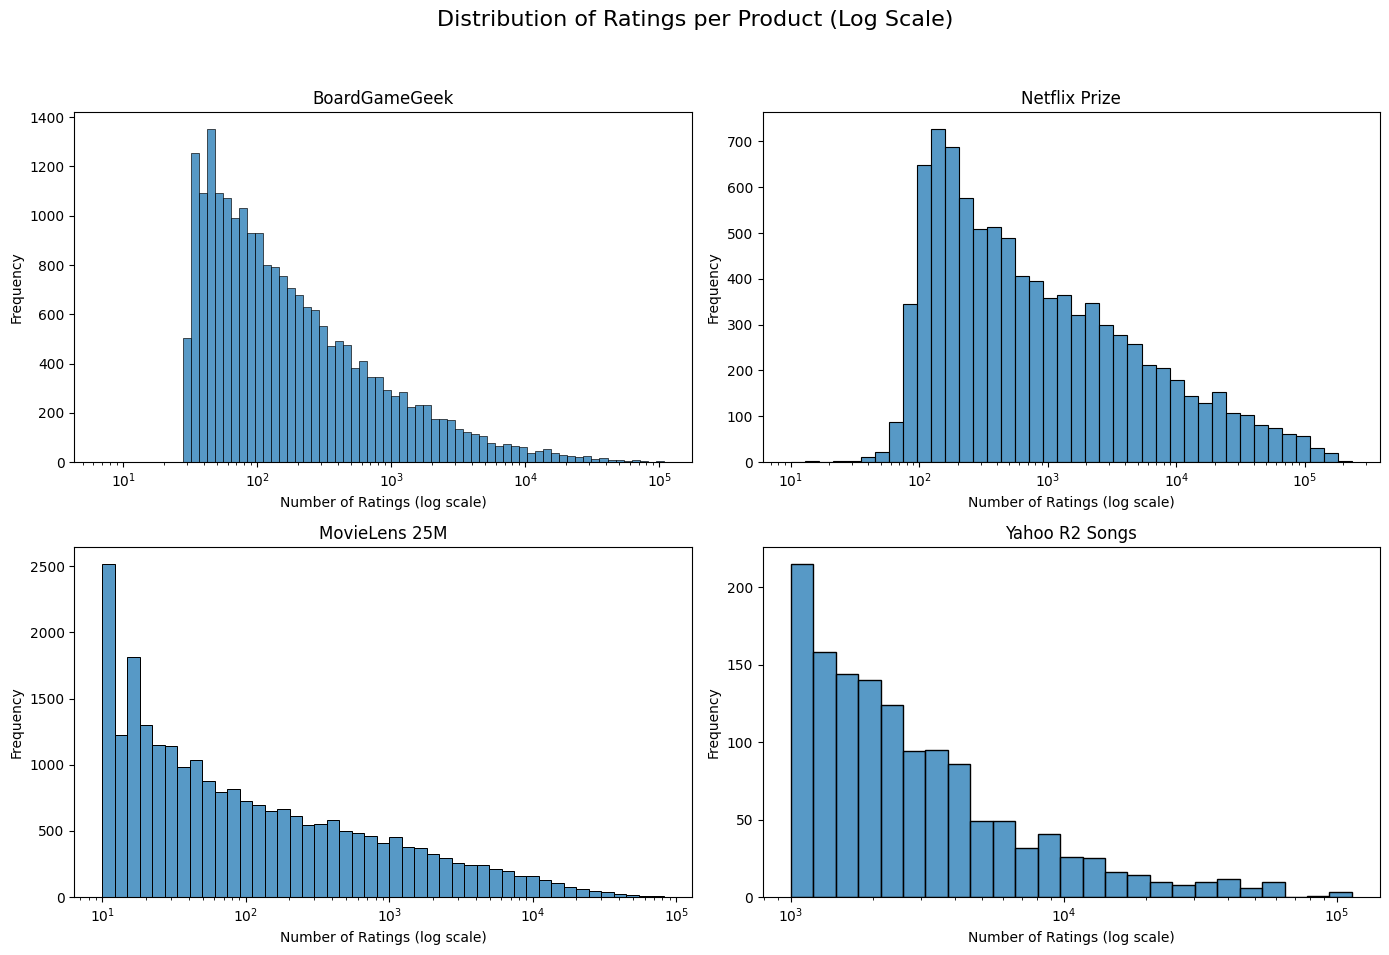

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Ratings per Product (Log Scale)', fontsize=16)

bg_counts = bg.groupby('item_id').agg({'rating': 'count'})
sns.histplot(bg_counts['rating'], log_scale=(True, False), ax=axs[0, 0])
axs[0, 0].set_title('BoardGameGeek')
axs[0, 0].set_xlabel('Number of Ratings (log scale)')
axs[0, 0].set_ylabel('Frequency')

np_counts = np.groupby('item_id').agg({'rating': 'count'})
sns.histplot(np_counts['rating'], log_scale=(True, False), ax=axs[0, 1])
axs[0, 1].set_title('Netflix Prize')
axs[0, 1].set_xlabel('Number of Ratings (log scale)')
axs[0, 1].set_ylabel('Frequency')

m_counts = m.groupby('item_id').agg({'rating': 'count'})
sns.histplot(m_counts['rating'], log_scale=(True, False), ax=axs[1, 0])
axs[1, 0].set_title('MovieLens 25M')
axs[1, 0].set_xlabel('Number of Ratings (log scale)')
axs[1, 0].set_ylabel('Frequency')

y_counts = y.groupby('item_id').agg({'rating': 'count'})
sns.histplot(y_counts['rating'], log_scale=(True, False), ax=axs[1, 1])
axs[1, 1].set_title('Yahoo R2 Songs')
axs[1, 1].set_xlabel('Number of Ratings (log scale)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

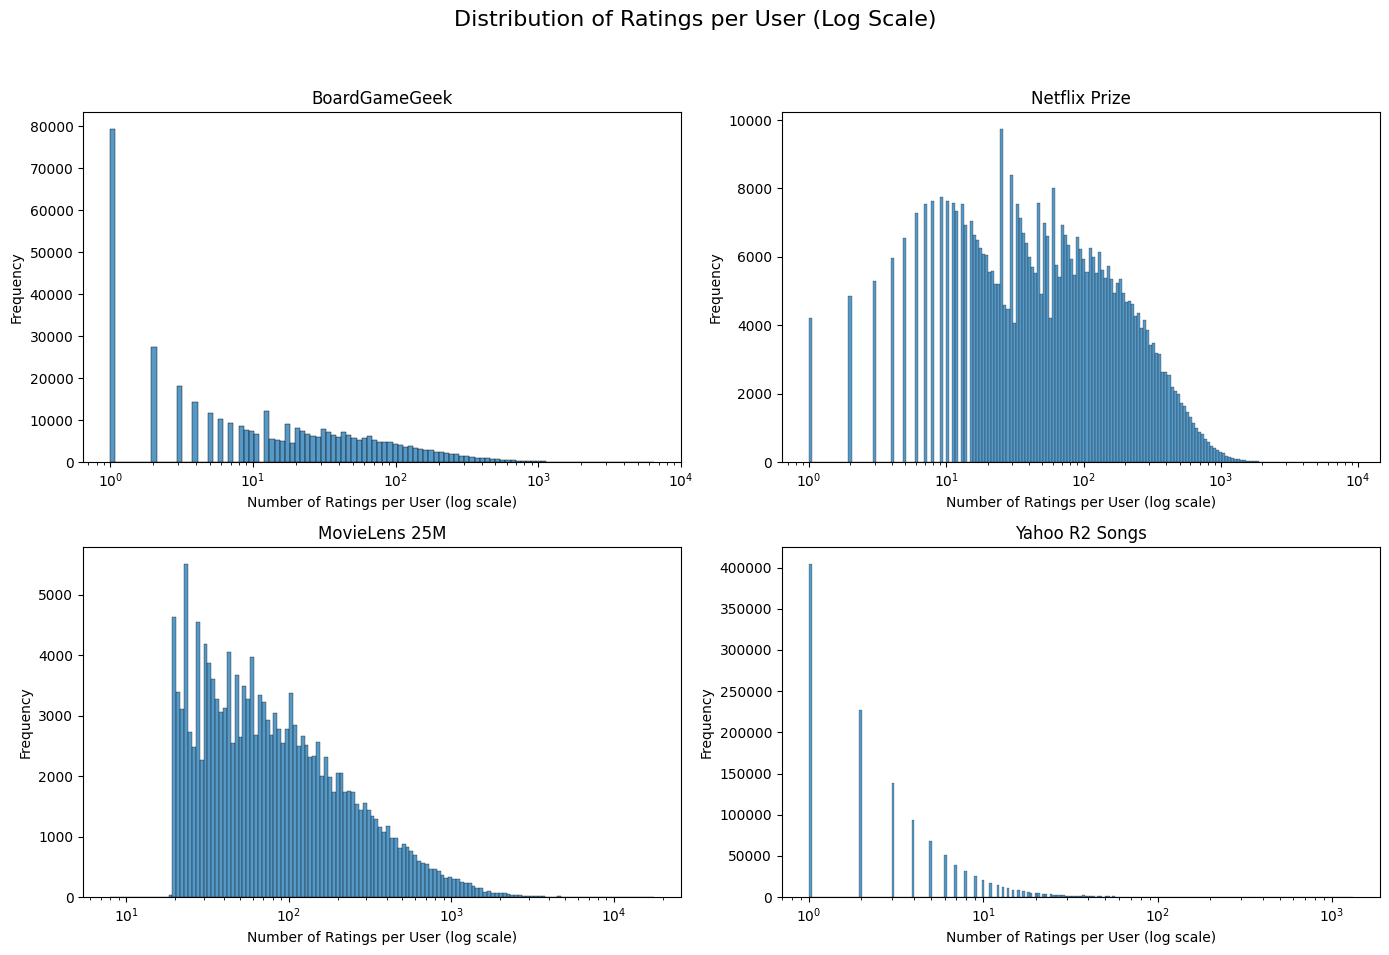

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Ratings per User (Log Scale)', fontsize=16)

bg_counts = bg.groupby('user_id').agg({'rating': 'count'})
sns.histplot(bg_counts['rating'], log_scale=(True, False), ax=axs[0, 0])
axs[0, 0].set_title('BoardGameGeek')
axs[0, 0].set_xlabel('Number of Ratings per User (log scale)')
axs[0, 0].set_ylabel('Frequency')

np_counts = np.groupby('user_id').agg({'rating': 'count'})
sns.histplot(np_counts['rating'], log_scale=(True, False), ax=axs[0, 1])
axs[0, 1].set_title('Netflix Prize')
axs[0, 1].set_xlabel('Number of Ratings per User (log scale)')
axs[0, 1].set_ylabel('Frequency')

m_counts = m.groupby('user_id').agg({'rating': 'count'})
sns.histplot(m_counts['rating'], log_scale=(True, False), ax=axs[1, 0])
axs[1, 0].set_title('MovieLens 25M')
axs[1, 0].set_xlabel('Number of Ratings per User (log scale)')
axs[1, 0].set_ylabel('Frequency')

y_counts = y.groupby('user_id').agg({'rating': 'count'})
sns.histplot(y_counts['rating'], log_scale=(True, False), ax=axs[1, 1])
axs[1, 1].set_title('Yahoo R2 Songs')
axs[1, 1].set_xlabel('Number of Ratings per User (log scale)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<Axes: xlabel='rating', ylabel='Count'>

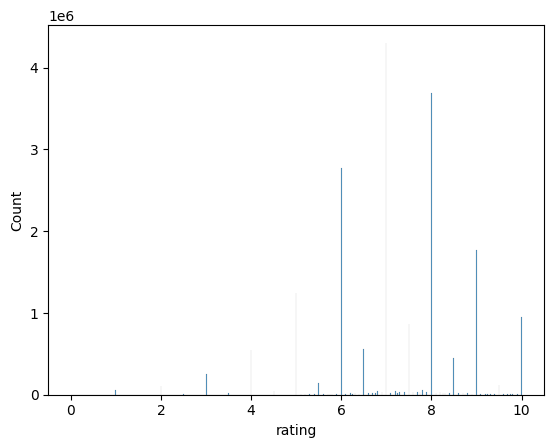

In [8]:
sns.histplot(bg.rating)

<Axes: xlabel='rating', ylabel='Count'>

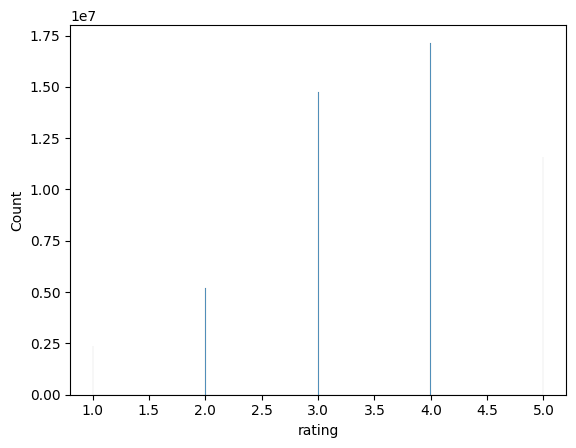

In [9]:
sns.histplot(np.rating)

<Axes: xlabel='rating', ylabel='Count'>

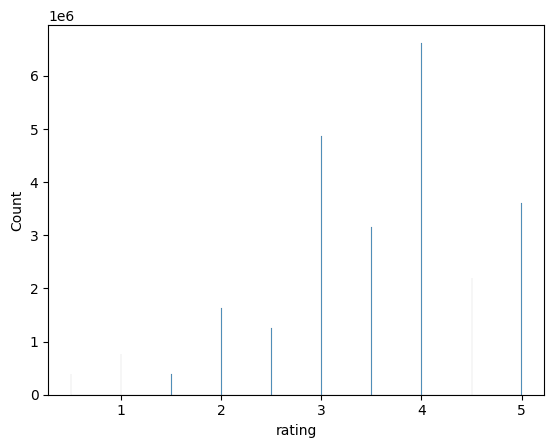

In [10]:
sns.histplot(m.rating)

<Axes: xlabel='rating', ylabel='Count'>

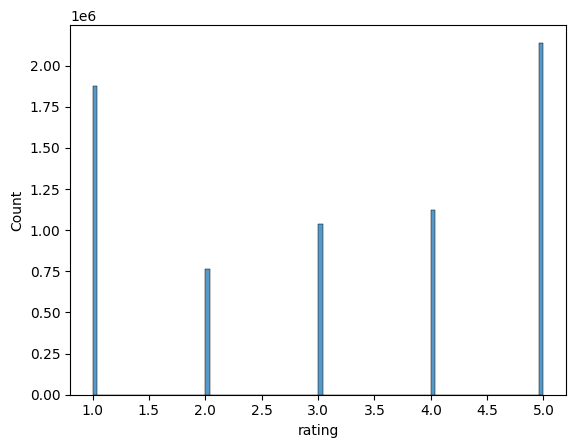

In [11]:
sns.histplot(y.rating)

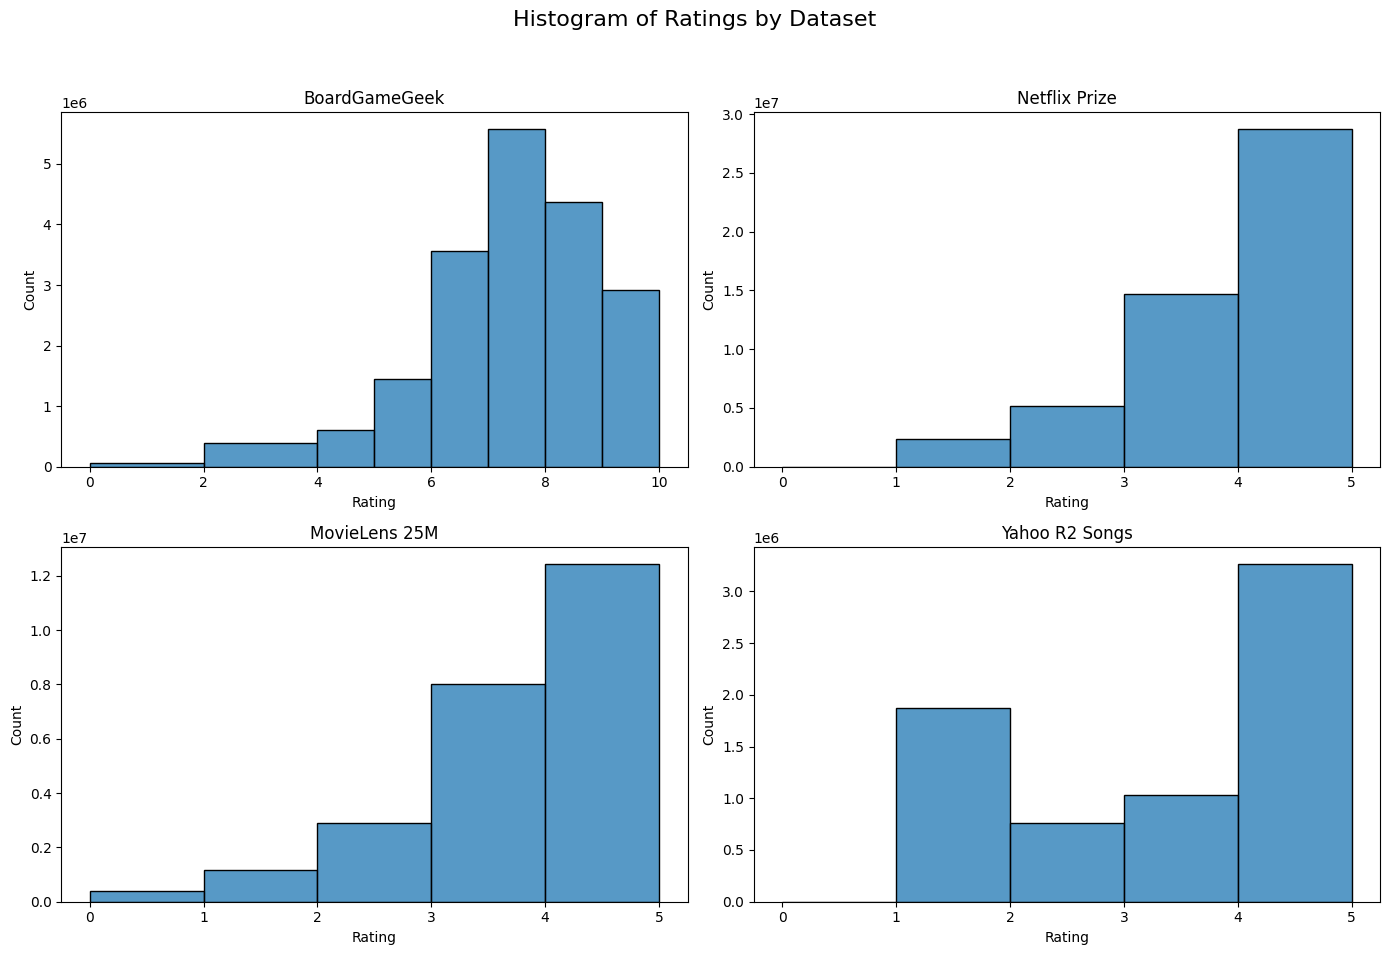

In [15]:

bg_bins = [0,2,4, 5, 6, 7, 8, 9, 10]  
other_bins = [0, 1, 2, 3, 4, 5]   


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Histogram of Ratings by Dataset', fontsize=16)

sns.histplot(bg['rating'], bins=bg_bins, ax=axs[0, 0])
axs[0, 0].set_title('BoardGameGeek')
axs[0, 0].set_xlabel('Rating')
axs[0, 0].set_ylabel('Count')

sns.histplot(np['rating'], bins=other_bins, ax=axs[0, 1])
axs[0, 1].set_title('Netflix Prize')
axs[0, 1].set_xlabel('Rating')
axs[0, 1].set_ylabel('Count')

sns.histplot(m['rating'], bins=other_bins, ax=axs[1, 0])
axs[1, 0].set_title('MovieLens 25M')
axs[1, 0].set_xlabel('Rating')
axs[1, 0].set_ylabel('Count')

sns.histplot(y['rating'], bins=other_bins, ax=axs[1, 1])
axs[1, 1].set_title('Yahoo R2 Songs')
axs[1, 1].set_xlabel('Rating')
axs[1, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()